In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

import analysis_utils as aute

In [4]:
# #################
# ### Constants ###
# #################

date_study_end = pd.Timestamp("23-12-2023")
path_to_cuest = "../Cuestionarios/"

C:\Users\jllanes\AppData\Local\Temp\ipykernel_11440\293241099.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_study_end = pd.Timestamp("23-12-2023")


In [3]:
os.listdir("../Cuestionarios")

['CHATBOTs_CUESTIONARIO_BFI.csv',
 'CHATBOTs_CUESTIONARIO_BFI.xlsx',
 'CHATBOTs_Demografico.csv',
 'CHATBOTs_Demografico.xlsx',
 'CHATBOTs_E.csv',
 'CHATBOTs_E.xlsx',
 'CHATBOTs_F.csv',
 'CHATBOTs_F.xlsx',
 'CHATBOTs_LSAS.csv',
 'CHATBOTs_LSAS.xlsx',
 'CHATBOTs_N1.csv',
 'CHATBOTs_N1.xlsx',
 'CHATBOTs_N2.csv',
 'CHATBOTs_N2.xlsx',
 'CHATBOTs_PERCEPCIÓN_AVATARES.csv',
 'CHATBOTs_PERCEPCIÓN_AVATARES.xlsx',
 'CHATBOTs_PHQ-9.csv',
 'CHATBOTs_PHQ-9.xlsx',
 'CHATBOTs_PHQ-9v5.xlsx',
 'CHATBOTs_R.csv',
 'CHATBOTs_R.xlsx',
 'CHATBOTs_RELAP.csv',
 'CHATBOTs_RELAP.xlsx',
 'CHATBOTs_RME-18.csv',
 'CHATBOTs_RME-18.xlsx',
 'CHATBOTs_SENSORES_POST.csv',
 'CHATBOTs_SENSORES_POST.xlsx',
 'CHATBOTs_SENSORES_PRE.csv',
 'CHATBOTs_SENSORES_PRE.xlsx',
 'CHATBOTs_STAI-Y1.csv',
 'CHATBOTs_STAI-Y1.xlsx',
 'CHATBOTs_SUS.csv',
 'CHATBOTs_SUS.xlsx',
 'CHATBOTs_T.csv',
 'CHATBOTs_T.xlsx',
 'CHATBOTs_TECA.csv',
 'CHATBOTs_TECA.xlsx',
 'CHATBOTs_VAS-E.csv',
 'CHATBOTs_VAS-E.xlsx',
 'PostProcessedCuest']

## STAI-Y1

In [5]:
df_stai_y1 = pd.read_excel("../Cuestionarios/CHATBOTs_STAI-Y1.xlsx")
questions_stai_y1 = dict(df_stai_y1.loc[0])
df_stai_y1 = pd.read_excel("../Cuestionarios/CHATBOTs_STAI-Y1.xlsx", skiprows=[1])
print("Shape", df_stai_y1.shape)
print("Columns", df_stai_y1.columns)

Shape (109, 30)
Columns Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'A continuación, encontrará unas frases que se utilizan corrientemente para describirse uno a sí mismo. Lea cada frase y señale la puntuación de "nada" a "mucho" que indique mejor cómo se siente usted ahora mismo, en este momento. No hay respuestas buenas ni malas. No emplee demasiado tiempo en cada frase y conteste señalando la respuesta que mejor describa su situación actual.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')


In [6]:
from_cat_to_num_dict = {"Nada": 1, "Algo": 2, "Bastante": 3, "Mucho": 4}

In [7]:
df_stai_y1["Unnamed: 11"]

0      Bastante
1          Algo
2      Bastante
3      Bastante
4      Bastante
         ...   
104    Bastante
105    Bastante
106    Bastante
107        Algo
108         NaN
Name: Unnamed: 11, Length: 109, dtype: object

In [8]:
cols_see = [
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
    'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
    'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'
]

for col in cols_see:
    print(df_stai_y1[col].nunique())

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


### BFI

In [9]:
df_bfi = pd.read_excel("../Cuestionarios/CHATBOTs_CUESTIONARIO_BFI.xlsx")
df_bfi.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Valore de 1 a 5 cada afirmación del cuestionario siguiendo el siguiente criterio:',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53'],
      dtype='obje

### Demographic

In [10]:
df_demo = pd.read_excel("../Cuestionarios/CHATBOTs_Demografico.xlsx", skiprows=[1])
print("Shape", df_demo.shape)
print(df_demo.columns)

Shape (114, 39)
Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario', 'Marque con una su género:',
       'Escriba su fecha de nacimiento', 'Escriba su nacionalidad',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Marque con una cruz la situación en la que se encuentra',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Marque su nivel de estudios', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Marque de forma aproximada su nivel de ingresos anuales',
       'Señala su horientación sexual',
       'Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?',
       'Unnamed: 35', '¿Has estado alguna vez en terapia psicológica?',
       '¿Tomas alguna medicación psicofarmacológica?', 'Unnamed:

In [11]:
df_demo

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Marque de forma aproximada su nivel de ingresos anuales,Señala su horientación sexual,"Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?",Unnamed: 35,¿Has estado alguna vez en terapia psicológica?,¿Tomas alguna medicación psicofarmacológica?,Unnamed: 38
0,118255079625,448136109,2023-02-28 08:41:21,2023-02-28 09:08:01,158.42.142.216,NaN,NaN,NaN,NaN,USER_50_CB2,...,NaN,Estudios universitarios,NaN,Menos de 15.000€,Heterosexual,"Sí, estimas de numero de horas que le dedicas ...",< 30 min,"Sí, hace más de 5 años",No,NaN
1,118253980744,448136109,2023-02-27 12:51:33,2023-02-27 13:00:08,158.42.142.216,NaN,NaN,NaN,NaN,USER_49_CB2,...,NaN,NaN,Estudios de postgrado (máster y/o doctorado),Entre 15.001€ y 30.000€,Heterosexual,No,NaN,"Sí, en el último año",No,NaN
2,118253913984,448136109,2023-02-27 11:04:52,2023-02-27 11:10:44,158.42.142.216,NaN,NaN,NaN,NaN,USER_48_CB2,...,NaN,Estudios universitarios,NaN,Menos de 15.000€,Heterosexual,"Sí, estimas de numero de horas que le dedicas ...",1,Nunca,No,NaN
3,118253843725,448136109,2023-02-27 08:58:26,2023-02-27 09:05:29,158.42.142.216,NaN,NaN,NaN,NaN,USER_47_CB2,...,Bachillerato/Formación profesional,NaN,NaN,NS/NC,Heterosexual,"Sí, estimas de numero de horas que le dedicas ...",2,"Sí, en el último año",No,NaN
4,118252040432,448136109,2023-02-24 12:56:05,2023-02-24 13:02:18,158.42.142.216,NaN,NaN,NaN,NaN,USER_46_CB2,...,NaN,Estudios universitarios,NaN,Entre 15.001€ y 30.000€,Heterosexual,No,NaN,"Sí, en el último año",No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,118163072253,448136109,2022-10-31 10:18:49,2022-10-31 10:19:12,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA6,...,NaN,NaN,NaN,Menos de 15.000€,Homosexual,No,NaN,"Sí, en el último año","Sí, ansiolíticos",NaN
110,118163071767,448136109,2022-10-31 10:17:50,2022-10-31 10:17:57,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,118163071339,448136109,2022-10-31 10:17:06,2022-10-31 10:17:11,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,118163070503,448136109,2022-10-31 10:15:23,2022-10-31 10:15:29,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
age_list = []
for date in df_demo["Escriba su fecha de nacimiento"].values:
    
    if isinstance(date, str):
        
        date = date.replace(",", "/") if "," in date else date
        date = date.replace("mayo", "05") if "mayo" in date else date
        date = date.replace(" de enero de ", "01") if "de enero de" in date else date
        date = date.replace("\\", "/") if "\\" in date else date
        
        if len(date) == 2:
            age_list.append(int(date))
        elif date == "23012023":
            age_list.append(np.nan)
        else:
            subj_age = np.abs(date_study_end - pd.Timestamp(date))
            age_list.append(np.round(subj_age.days/365, 2))
    else:
        if np.isnan(date):
            age_list.append(np.nan)
        elif len(str(date)) == 2:
            age_list.append(date)
        elif len(str(date)) == 4:
            date_year = pd.Timestamp("01/01/" + str(date))
            age_computed = np.round((date_study_end - date_year).days/365, 2)
            age_list.append(age_computed)
        elif len(str(date)) > 4:
            date_year = pd.Timestamp("01/01/" + str(date)[:4])
            age_computed = np.round((date_study_end - date_year).days/365, 2)
            age_list.append(age_computed)
        else:
            print("Bad age", date)
        
print(age_list)

df_demo["AgeYears"] = age_list
df_demo.loc[df_demo["AgeYears"] < 18, "AgeYears"] = np.nan

[23.6, 27.86, 21.47, 19.12, 49.55, 33.89, 46.01, 42.29, 55.35, 50.48, 24.07, 49.24, 46.6, 32.82, 33.38, 36.56, 32.42, nan, 55.91, 38.46, 48.83, 55.01, 34.82, 55.64, 28.39, 21.63, 30.95, 25.42, 54, 36.12, 29.33, 48.32, 46.59, 37.87, 4, 21.31, 22.56, 43.24, 43.7, 45.36, 46.84, 23.96, 49.01, 26, 21.7, 19.61, 26.8, 22.3, 19.29, 21.88, 26.49, nan, 38.56, 27.01, 24.04, 50.88, 26.99, 43.3, 44.01, 34.36, 46.27, 28.63, 20.47, 47.53, 36.83, 42.22, 36.5, 46.46, 44.21, 37.05, 29.44, 25.46, 25.12, 44.93, 23.24, 20.92, 30.53, 44.24, 21.42, 20.42, 19, 20.53, 35.28, 23.36, 36.92, 20.45, 21.1, 43.41, 21.54, 28.38, 27.95, 31.72, 23.75, 51.36, 22.74, 23.08, 25.3, 47.12, 46.65, 32.51, 23.73, 21.01, 43.17, 23.65, 26.85, 28.12, 30.76, nan, 23.12, 24.78, nan, nan, nan, 24.99]


C:\Users\jllanes\AppData\Local\Temp\ipykernel_11440\3244480124.py:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  subj_age = np.abs(date_study_end - pd.Timestamp(date))


Num of Age data 107 over 114
Mean Age = 33.5086 +/- 10.9099 ; Median = 30.76 ; Min. =  19.0 ; Max. =  55.91


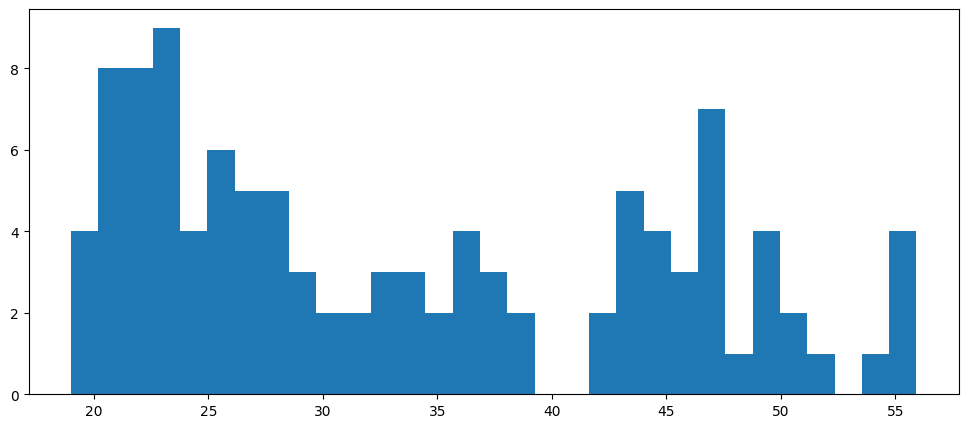

In [56]:
print("Num of Age data", df_demo["AgeYears"].dropna().shape[0], "over", df_demo.shape[0])
aute.stat_print(df_demo["AgeYears"], "Age")

plt.figure(figsize=(12, 5))
plt.hist(df_demo["AgeYears"], bins=31)

plt.show()

In [13]:
gender_f_name = "Marque con una su género:"
df_demo["GenderFem"] = (df_demo[gender_f_name] == "Femenino")*1
df_demo["GenderOther"] = ((df_demo[gender_f_name] != "Femenino") * (df_demo[gender_f_name] != "Masculino"))*1
df_demo[["GenderFem", "GenderOther"]].head(8)

,GenderFem,GenderOther
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1


In [62]:
v_f_name = "Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?"
v_num_f_name = "Unnamed: 35"

df_demo[v_num_f_name] = df_demo[v_num_f_name].replace({"1.5h": 1.5, "1 hora": 1})

print(df_demo[v_f_name].unique())

num_h_play_list = []
for v in df_demo[v_num_f_name].values:
    if isinstance(v, str):
        if v == "< 30 min":
            num_h_play_list.append(0.25)
        elif v == "menos de una":
            num_h_play_list.append(0.5)
        elif v == "entre 30 y 60 minutos":
            num_h_play_list.append(0.75)
        else:
            num_h_play_list.append(float(v.split()[0]))
    else:
        num_h_play_list.append(v)

df_demo["NumHPlayVGame"] = num_h_play_list

df_demo["PlayVGame"] = (df_demo[v_f_name] == "Sí, estimas de numero de horas que le dedicas cada día:")*1

df_demo[[v_f_name, "PlayVGame", v_num_f_name, "NumHPlayVGame"]].head(8)

['Sí, estimas de numero de horas que le dedicas cada día:' 'No' nan]


,"Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?",PlayVGame,Unnamed: 35,NumHPlayVGame
0,"Sí, estimas de numero de horas que le dedicas ...",1,< 30 min,0.25
1,No,0,NaN,NaN
2,"Sí, estimas de numero de horas que le dedicas ...",1,1,1.00
3,"Sí, estimas de numero de horas que le dedicas ...",1,2,2.00
4,No,0,NaN,NaN
5,"Sí, estimas de numero de horas que le dedicas ...",1,1,1.00
6,No,0,NaN,NaN
7,No,0,NaN,NaN


In [63]:
ps_f_name = "¿Has estado alguna vez en terapia psicológica?"
print(df_demo[ps_f_name].unique())

df_demo["OrdinalPs"] = [0] * df_demo.shape[0]

df_demo.loc[df_demo[ps_f_name]=="Sí, en el último año", "OrdinalPs"] = 1
df_demo.loc[df_demo[ps_f_name]=="Sí, hace más de 1 año", "OrdinalPs"] = 2
df_demo.loc[df_demo[ps_f_name]=="Sí, hace más de 5 años", "OrdinalPs"] = 3
df_demo.loc[pd.isna(df_demo[ps_f_name]), "OrdinalPs"] = -1

df_demo[[ps_f_name, "OrdinalPs"]].head(8)

['Sí, hace más de 5 años' 'Sí, en el último año' 'Nunca'
 'Sí, hace más de 2 años' 'Sí, hace más de 1 año' nan]


,¿Has estado alguna vez en terapia psicológica?,OrdinalPs
0,"Sí, hace más de 5 años",3
1,"Sí, en el último año",1
2,Nunca,0
3,"Sí, en el último año",1
4,"Sí, en el último año",1
5,Nunca,0
6,"Sí, hace más de 5 años",3
7,"Sí, hace más de 5 años",3


In [64]:
m_f_name = "¿Tomas alguna medicación psicofarmacológica?"
print(df_demo[m_f_name].unique())

df_demo["NoMedicine"] = ( (df_demo[m_f_name] == "No") | (pd.isna(df_demo[m_f_name])) ) * 1

df_demo[[m_f_name, "NoMedicine"]].head(8)

['No' 'Sí, antidepresivos' 'Otro (especifique)' nan 'Sí, ansiolíticos']


,¿Tomas alguna medicación psicofarmacológica?,NoMedicine
0,No,1
1,No,1
2,No,1
3,No,1
4,No,1
5,No,1
6,No,1
7,No,1


In [65]:
df_demo.to_csv(path_to_cuest + "PostProcessedCuest/DemographicPostProc.csv", sep=";")

## LSAS

In [66]:
df_lsas = pd.read_excel("../Cuestionarios/CHATBOTs_LSAS.xlsx", skiprows=[1])
print(df_lsas.columns)
print("Shape", df_lsas.shape)
display(df_lsas.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Por favor, lea con atención cada grupo de afirmaciones y luego elija un afirmación de cada grupo, que mejor le representa COMO SE HA SENTIDO EN LAS ÚLTIMAS DOS SEMANAS.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Por favor, lea con atención cada grupo de afirmaciones y luego elija un afirmación de cada grupo, que mejor le representa COMO SE HA SENTIDO EN LAS ÚLTIMAS DOS SEMANAS..1',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 3

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,118255084154,448135553,2023-02-28 08:41:36,2023-02-28 09:16:00,158.42.142.216,NaN,NaN,NaN,NaN,USER_50_CB2,...,Frecuentemente lo evito,En ocasiones lo evito,Nunca lo evito,Frecuentemente lo evito,Nunca lo evito,Nunca lo evito,Habitualmente lo evit,Nunca lo evito,Nunca lo evito,Nunca lo evito
1,118253989624,448135553,2023-02-27 12:51:53,2023-02-27 13:15:35,158.42.142.216,NaN,NaN,NaN,NaN,USER_49_CB2,...,Frecuentemente lo evito,En ocasiones lo evito,Habitualmente lo evit,En ocasiones lo evito,Frecuentemente lo evito,En ocasiones lo evito,Frecuentemente lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito
2,118253918867,448135553,2023-02-27 11:05:05,2023-02-27 11:19:39,158.42.142.216,NaN,NaN,NaN,NaN,USER_48_CB2,...,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito
3,118253848148,448135553,2023-02-27 08:58:47,2023-02-27 09:15:46,158.42.142.216,NaN,NaN,NaN,NaN,USER_47_CB2,...,Habitualmente lo evit,Frecuentemente lo evito,Nunca lo evito,En ocasiones lo evito,En ocasiones lo evito,Nunca lo evito,Frecuentemente lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito
4,118252044991,448135553,2023-02-24 12:56:25,2023-02-24 13:11:51,158.42.142.216,NaN,NaN,NaN,NaN,USER_46_CB2,...,En ocasiones lo evito,Frecuentemente lo evito,Frecuentemente lo evito,En ocasiones lo evito,Frecuentemente lo evito,Nunca lo evito,Frecuentemente lo evito,Frecuentemente lo evito,Frecuentemente lo evito,Frecuentemente lo evito
5,118251989659,448135553,2023-02-24 11:26:28,2023-02-24 11:40:23,158.42.142.216,NaN,NaN,NaN,NaN,USER_45_CB2,...,Nunca lo evito,En ocasiones lo evito,Frecuentemente lo evito,En ocasiones lo evito,En ocasiones lo evito,En ocasiones lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito
6,118251903470,448135553,2023-02-24 08:45:37,2023-02-24 09:24:06,158.42.142.216,NaN,NaN,NaN,NaN,USER_44_CB2,...,Frecuentemente lo evito,En ocasiones lo evito,En ocasiones lo evito,En ocasiones lo evito,En ocasiones lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito
7,118251078527,448135553,2023-02-23 13:00:05,2023-02-23 13:08:37,158.42.142.216,NaN,NaN,NaN,NaN,USER_43_CB2,...,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito


## N1 and N2

In [67]:
df_n1 = pd.read_excel("../Cuestionarios/CHATBOTs_N1.xlsx", skiprows=[1])
print(df_n1.columns)
print("Shape", df_n1.shape)
display(df_n1.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
       'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
       'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
       'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica t

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Relajado,Sorpresa,Tristeza,Disgusto.1,Felicidad.1,Enfado.1,Miedo.1,Relajado.1,Sorpresa.1,Tristeza.1
0,114256698163,423466282,2023-02-28 10:29:09,2023-02-28 10:35:54,158.42.142.216,NaN,NaN,NaN,NaN,USER_50_CB2,...,30.0,1.0,1.0,1.0,73.0,1.0,1.0,71.0,2.0,1.0
1,114255802040,423466282,2023-02-27 14:03:33,2023-02-27 14:12:58,158.42.142.216,NaN,NaN,NaN,NaN,USER_49_CB2,...,50.0,2.0,50.0,4.0,77.0,5.0,4.0,94.0,50.0,3.0
2,114255713052,423466282,2023-02-27 12:11:27,2023-02-27 12:18:52,158.42.142.216,NaN,NaN,NaN,NaN,USER_48_CB2,...,57.0,9.0,0.0,1.0,0.0,0.0,1.0,34.0,1.0,0.0
3,114255638760,423466282,2023-02-27 09:59:29,2023-02-27 10:14:32,158.42.142.216,NaN,NaN,NaN,NaN,USER_47_CB2,...,100.0,4.0,1.0,2.0,14.0,1.0,1.0,100.0,1.0,1.0
4,114253859965,423466282,2023-02-24 13:55:08,2023-02-24 14:01:21,158.42.142.216,NaN,NaN,NaN,NaN,USER_46_CB2,...,12.0,0.0,0.0,48.0,0.0,17.0,0.0,50.0,28.0,63.0
5,114253803194,423466282,2023-02-24 12:02:06,2023-02-24 12:17:53,158.42.142.216,NaN,NaN,NaN,NaN,USER_45_CB2,...,51.0,33.0,31.0,17.0,31.0,17.0,17.0,50.0,32.0,16.0
6,114253749077,423466282,2023-02-24 10:21:00,2023-02-24 10:32:01,158.42.142.216,NaN,NaN,NaN,NaN,USER_44_CB2,...,81.0,9.0,5.0,2.0,10.0,0.0,0.0,2.0,2.0,0.0
7,114252802736,423466282,2023-02-23 13:34:08,2023-02-23 13:44:44,158.42.142.216,NaN,NaN,NaN,NaN,USER_43_CB2,...,50.0,50.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0


In [68]:
old_columns_name = [
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
    'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
    'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
]

new_columns_name = [
    "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
]

change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

In [69]:
for old_c, new_c in change_name_column_dict.items():
    new_col_list = [int(v.split(".")[0]) if isinstance(v, str) else int(v) for v in df_n1[old_c].values]
    df_n1[new_c] = new_col_list
    
display(df_n1[new_columns_name].head(8))

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8
0,4,5,7,5,3,7,2,6
1,2,6,5,6,4,7,2,6
2,2,2,5,2,6,4,5,2
3,4,3,5,1,3,5,1,6
4,6,5,2,5,8,3,4,6
5,2,2,4,3,7,5,5,5
6,4,6,5,2,8,5,1,2
7,4,5,7,3,5,5,5,5


## Percepción avatares

In [70]:
df_pa = pd.read_excel("../Cuestionarios/CHATBOTs_PERCEPCIÓN_AVATARES.xlsx", skiprows=[1])
print(df_pa.columns)
print("Shape", df_pa.shape)
display(df_pa.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Pensando en los avatares con los que acabas de hablar, evalúa el contenido de las siguientes frases:',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')
Shape (106, 30)


,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,118255171482,448444258,2023-02-28 10:56:33,2023-02-28 11:11:50,158.42.142.216,NaN,NaN,NaN,NaN,USER_50_CB2,...,De acuerdo,De acuerdo,Neutral,De acuerdo,De acuerdo,Muy de acuerdo,En desacuerdo,En desacuerdo,Neutral,De acuerdo
1,118254072057,448444258,2023-02-27 14:45:10,2023-02-27 14:57:19,158.42.142.216,NaN,NaN,NaN,NaN,USER_49_CB2,...,Muy de acuerdo,Muy de acuerdo,De acuerdo,De acuerdo,Neutral,Neutral,Muy de acuerdo,En desacuerdo,De acuerdo,De acuerdo
2,118253969406,448444258,2023-02-27 12:39:45,2023-02-27 12:42:15,158.42.142.216,NaN,NaN,NaN,NaN,USER_48_CB2,...,Muy en desacuerdo,En desacuerdo,Muy en desacuerdo,En desacuerdo,Muy en desacuerdo,Muy en desacuerdo,Muy en desacuerdo,Muy en desacuerdo,En desacuerdo,En desacuerdo
3,118253908359,448444258,2023-02-27 10:56:44,2023-02-27 11:03:46,158.42.142.216,NaN,NaN,NaN,NaN,USER_47_CB2,...,En desacuerdo,Neutral,En desacuerdo,De acuerdo,Neutral,Neutral,En desacuerdo,De acuerdo,Neutral,Neutral
4,118252112778,448444258,2023-02-24 14:41:03,2023-02-24 14:44:48,158.42.142.216,NaN,NaN,NaN,NaN,USER_46_CB2,...,Neutral,Neutral,De acuerdo,De acuerdo,En desacuerdo,En desacuerdo,NaN,De acuerdo,De acuerdo,En desacuerdo
5,118252034777,448444258,2023-02-24 12:50:46,2023-02-24 12:53:58,158.42.142.216,NaN,NaN,NaN,NaN,USER_45_CB2,...,En desacuerdo,En desacuerdo,Neutral,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
6,118251982310,448444258,2023-02-24 11:14:47,2023-02-24 11:25:48,158.42.142.216,NaN,NaN,NaN,NaN,USER_44_CB2,...,En desacuerdo,Neutral,Neutral,De acuerdo,De acuerdo,Neutral,En desacuerdo,De acuerdo,De acuerdo,De acuerdo
7,118251118792,448444258,2023-02-23 14:09:51,2023-02-23 14:12:12,158.42.142.216,NaN,NaN,NaN,NaN,USER_43_CB2,...,De acuerdo,De acuerdo,De acuerdo,Neutral,Neutral,De acuerdo,De acuerdo,De acuerdo,Neutral,Neutral


## Avatars

### Happy

In [71]:
df_happy = pd.read_excel("../Cuestionarios/CHATBOTs_F.xlsx", skiprows=[1])
print(df_happy.shape)
print(df_happy.columns)

(105, 32)
Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
       'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
       'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
       'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante"

In [72]:
# ###########################
# ### Change column names ###
# ###########################

old_columns_name = [
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
    'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
    'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
]

new_columns_name = [
    "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
]

change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

df_happy = df_happy.rename(columns=change_name_column_dict)

# #########################
# ### Change categories ###
# #########################

from_one_to_seven = {
    '1. Muy forzado': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy natural': 7
}
from_one_to_seven_2 = {
    '1. Muy artificial': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy realista': 7
}
from_one_to_nine = {
    '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
}
from_one_to_nine_arousal = {
    '1. Ninguno': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Mucho': 9
}
from_one_to_nine_dom = {
    '1. No dominante': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Muy dominante': 9
}
from_one_to_nine_pos = {
    '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
}
from_one_to_nine_calm = {
    '1. Calma': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Excitación': 9
}
categories_dict_list = [
    from_one_to_seven,
    from_one_to_seven_2,
    from_one_to_nine,
    from_one_to_nine_arousal,
    from_one_to_nine_dom,
    from_one_to_nine_pos,
    from_one_to_nine_calm,
    from_one_to_nine_dom
]

change_value_per_column_dict = dict(zip(new_columns_name, categories_dict_list))

df_happy = df_happy.replace(change_value_per_column_dict)

### All avatars

In [163]:
personality_cuest_list = ["CHATBOTs_F", "CHATBOTs_T", "CHATBOTs_E", "CHATBOTs_R", "CHATBOTs_N1", "CHATBOTs_N2"]
personality_cuest_to_save_list = [
    "CuestAvatarHappy", "CuestAvatarSad", "CuestAvatarAngry", "CuestAvatarRelax", "CuestAvatarN1", "CuestAvatarN2"
]

for i_pers, pers in enumerate(personality_cuest_list):
    data = pd.read_excel(path_to_cuest + pers + ".xlsx", skiprows=[1])
    
    # ###########################
    # ### Change column names ###
    # ###########################

    old_columns_name = [
        'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
        'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
        'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
        'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
        'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
        'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
        'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
        'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
    ]

    new_columns_name = [
        "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
    ]

    change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

    data = data.rename(columns=change_name_column_dict)

    # #########################
    # ### Change categories ###
    # #########################

    from_one_to_seven = {
        '1. Muy forzado': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy natural': 7
    }
    from_one_to_seven_2 = {
        '1. Muy artificial': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy realista': 7
    }
    from_one_to_nine = {
        '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
    }
    from_one_to_nine_arousal = {
        '1. Ninguno': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, 
        '9. Mucho': 9, "9. Intenso": 9
    }
    from_one_to_nine_dom = {
        '1. No dominante': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Muy dominante': 9
    }
    from_one_to_nine_pos = {
        '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
    }
    from_one_to_nine_calm = {
        '1. Calma': 1, "1. Ninguno": 1,
        '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Excitación': 9, "9. Intenso": 9
    }
    categories_dict_list = [
        from_one_to_seven,
        from_one_to_seven_2,
        from_one_to_nine,
        from_one_to_nine_arousal,
        from_one_to_nine_dom,
        from_one_to_nine_pos,
        from_one_to_nine_calm,
        from_one_to_nine_dom
    ]

    change_value_per_column_dict = dict(zip(new_columns_name, categories_dict_list))

    data = data.replace(change_value_per_column_dict)
    
    for col in new_columns_name:
        if data[col].dtype == "O":
            # The possible strings that are in a column are removed checking if they are strings or not.
            
            data_to_col_list = []
            for v in data[col]:
                if isinstance(v, str):
                    data_to_col_list.append(int(v.split(".")[0]))
                elif np.isnan(v):
                    data_to_col_list.append(np.nan)
                else:
                    int(v)
    
    data.to_csv(path_to_cuest + "PostProcessedCuest/" + personality_cuest_to_save_list[i_pers] + ".csv", sep=",")
    

## PHQ-9

In [143]:
df_phq9 = pd.read_excel("../Cuestionarios/CHATBOTs_PHQ-9.xlsx", skiprows=[1])

In [144]:
cols_to_sum = [
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
    'Unnamed: 19'
]

dict_to_replace = {
    "Ningún dia": 0,
    "Varios días": 1,
    "Más de la mitad de los días": 2,
    "Casi todos los días": 3
}

In [145]:
for col in cols_to_sum:
    df_phq9[col] = df_phq9[col].replace(dict_to_replace)

In [146]:
np.nansum(df_phq9[cols_to_sum], axis=1)

array([12., 14.,  7.,  9., 12.,  7., 13.,  3.,  8., 17.,  6.,  7.,  3.,
       10., 10., 17., 11., 12., 11., 15., 15., 11., 12., 12., 16., 12.,
        8., 15., 12., 19., 11., 21., 18.,  5., 13.,  1., 13., 10.,  7.,
       11.,  9.,  9., 16.,  1.,  4.,  6.,  2.,  1.,  4.,  2.,  8.,  0.,
        0.,  0.,  2.,  1.,  2.,  4.,  8.,  5.,  2.,  3.,  0.,  2.,  5.,
        0.,  0.,  2.,  5.,  4.,  4.,  1.,  6.,  1., 23., 12.,  9.,  2.,
        1.,  2., 14.,  4.,  3.,  4.,  2.,  5.,  1.,  9.,  4.,  2., 18.,
        8.,  8.,  3.,  2.,  0.,  3.,  8., 10.,  1., 14.,  6., 10.,  2.,
        2.,  2., 16.,  3.,  3.,  5.,  8.,  0.,  3.])

In [147]:
df_phq9["TotalSum"] = np.nansum(df_phq9[cols_to_sum], axis=1)

In [148]:
phq9_th_depress = 10

In [231]:
all_users_no_depress = df_phq9[df_phq9["TotalSum"] > 9]["Usuario"].values
subj_no_depress_list = [
    subj for subj in all_users_no_depress if isinstance(subj, str) and "CB" in subj and not "P" in subj
]
print("Below 5 = ", len(subj_no_depress_list))

Below 5 =  36


In [220]:
all_users_no_depress = df_phq9[df_phq9["TotalSum"] < 5]["Usuario"].values
subj_no_depress_list = [
    subj for subj in all_users_no_depress if isinstance(subj, str) and "CB" in subj and not "P" in subj
]
print("Below 5 = ", len(subj_no_depress_list))

Below 5 =  40


In [237]:
all_users_no_depress = df_phq9[df_phq9["TotalSum"] < phq9_th_depress]["Usuario"].values
subj_no_depress_list = [
    subj for subj in all_users_no_depress if isinstance(subj, str) and "CB" in subj and not "P" in subj
]
print("Num of subjects", len(subj_no_depress_list))
subj_no_depress_list

Num of subjects 64


['USER_48_CB2',
 'USER_47_CB2',
 'USER_45_CB2',
 'USER_43_CB2',
 'USER_42_CB2',
 'USER_40_CB2',
 'USER_39_CB2',
 'USER_38_CB2',
 'USER_24_CB2',
 'USER_17_CB2',
 'USER_15_CB2',
 'USER_12_CB2',
 'USER_10_CB2',
 'User_09_CB2',
 'User_07_CB2',
 'User_06_CB2',
 'User_05_CB2',
 'User_04_CB2',
 'USER_03_CB2',
 'USER_02_CB2',
 'USER_01_CB2',
 'User_52_CB',
 'User_51_CB',
 'User_50_CB',
 'User_49_CB',
 'User_48_CB',
 'User_47_CB',
 'User_46_CB',
 'User_45_CB',
 'User_44_CB',
 'User_43_CB',
 'User_42_CB',
 'User_41_CB',
 'User_40_CB',
 'User_39_CB',
 'User_38_CB',
 'User_37_CB',
 'User_36_CB',
 'User_35_CB',
 'User_34_CB',
 'User_33_CB',
 'User_30_CB',
 'User_29_CB',
 'User_28_CB',
 'User_27_CB',
 'User_25_CB',
 'User_24_CB',
 'User_23_CB',
 'User_22_CB',
 'User_21_CB',
 'User_20_CB',
 'User_19_CB',
 'User_18_CB',
 'User_17_CB',
 'User_15_CB',
 'User_14_CB',
 'User_13_CB',
 'User_10_CB',
 'User_09_CB',
 'User_07_CB',
 'User_05_CB',
 'User_03_CB',
 'User_02_CB',
 'User_01_CB']

In [238]:
df_phq9["Usuario"].values

array(['USER_50_CB2', 'USER_49_CB2', 'USER_48_CB2', 'USER_47_CB2',
       'USER_46_CB2', 'USER_45_CB2', 'USER_44_CB2', 'USER_43_CB2',
       'USER_42_CB2', 'USER_41_CB2', 'USER_40_CB2', 'USER_39_CB2',
       'USER_38_CB2', 'USER_37_CB2', 'USER_36_CB2', 'USER_35_CB2',
       'USER_34_CB2', 'USER_33_CB2', 'USER_32_CB2', 'USER_31_CB2',
       'USER_30_CB2', 'USER_29_CB2', 'USER_28_CB2', 'USER_27_CB2',
       'USER_26_CB2', 'USER_25_CB2', 'USER_24_CB2', 'USER_23_CB2',
       'USER_22_CB2', 'USER_21_CB2', 'USER_20_CB2', 'USER_19_CB2',
       'USER_18_CB2', 'USER_17_CB2', 'USER_16_CB2', 'USER_15_CB2',
       'USER_13_CB2', 'USER_13_CB2', 'USER_12_CB2', 'USER_11_CB2',
       'USER_10_CB2', 'User_09_CB2', 'User_08_CB2', 'User_07_CB2',
       'User_06_CB2', 'User_05_CB2', 'User_04_CB2', 'USER_03_CB2',
       'USER_02_CB2', 'USER_01_CB2', 'USER_PILOTO01_CB2', 'jjj', 'qqqq',
       'aaaa', 'User_52_CB', 'User_51_CB', 'User_50_CB', 'User_49_CB',
       'User_48_CB', 'User_47_CB', 'User_46_CB', 'Us

In [219]:
good_idx = [i_us for i_us, us in enumerate(df_phq9["Usuario"].values) if isinstance(us, str) and "_CB" in us]

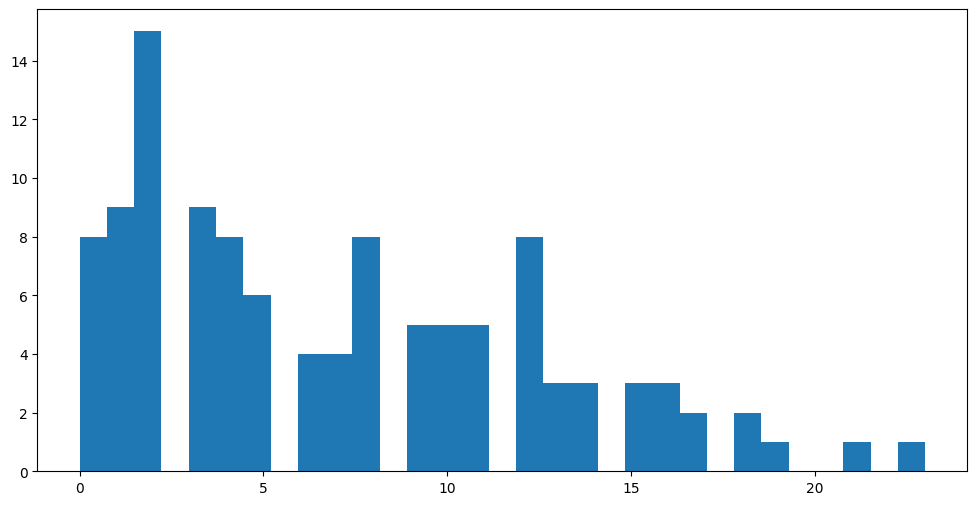

In [190]:
# print("Number below 5 = ", np.sum(df_phq9["TotalSum"].dropna() < 5))
# print("Number below 10 = ", np.sum(df_phq9["TotalSum"].dropna() < 10))

plt.figure(figsize=(12, 6))

plt.hist(df_phq9["TotalSum"], bins=31)

plt.show()

# Cuest Analysis

In [239]:
df_angry = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarAngry.csv")
idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"]) if us in subj_no_depress_list]
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_angry = df_angry.loc[idx_clean]
df_angry["Personality"] = "Angry"
print("Angry shape", df_angry.shape)

df_happy = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarHappy.csv")
idx_clean = [i_us for i_us, us in enumerate(df_happy["Usuario"]) if us in subj_no_depress_list]
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_happy = df_happy.loc[idx_clean]
df_happy["Personality"] = "Happy"

df_relax = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarRelax.csv")
idx_clean = [i_us for i_us, us in enumerate(df_relax["Usuario"]) if us in subj_no_depress_list]
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_relax = df_relax.loc[idx_clean]
df_relax["Personality"] = "Relax"

df_sad = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarSad.csv")
idx_clean = [i_us for i_us, us in enumerate(df_sad["Usuario"]) if us in subj_no_depress_list]
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_sad = df_sad.loc[idx_clean]
df_sad["Personality"] = "Sad"

df_neutral1 = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarN1.csv")
idx_clean = [i_us for i_us, us in enumerate(df_sad["Usuario"]) if us in subj_no_depress_list]
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_neutral1 = df_neutral1.loc[idx_clean]
df_neutral1["Personality"] = "Neutral1"

df_neutral2 = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarN2.csv")
idx_clean = [i_us for i_us, us in enumerate(df_sad["Usuario"]) if us in subj_no_depress_list]
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_neutral2 = df_neutral2.loc[idx_clean]
df_neutral2["Personality"] = "Neutral2"

df_all_cuest = pd.concat([df_angry, df_happy, df_relax, df_sad, df_neutral1, df_neutral2]).reset_index(drop=True)

Angry shape (61, 34)


### Natural and realism

In [257]:
# Hacer tabla de esto.
for p, df_p in df_all_cuest.groupby("Personality"):
    aute.stat_print(df_p["Question1"], p + "Question1")
    aute.stat_print(df_p["Question2"], p + "Question2")
    print()

Mean AngryQuestion1 = 4.6885 +/- 1.6942 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0
Mean AngryQuestion2 = 4.7869 +/- 1.7093 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0

Mean HappyQuestion1 = 5.0794 +/- 1.5358 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0
Mean HappyQuestion2 = 4.7937 +/- 1.6538 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0

Mean Neutral1Question1 = 3.7778 +/- 1.6945 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0
Mean Neutral1Question2 = 3.7143 +/- 1.6176 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0

Mean Neutral2Question1 = 4.0794 +/- 1.5867 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0
Mean Neutral2Question2 = 3.7937 +/- 1.3704 ; Median = 4.0 ; Min. =  1.0 ; Max. =  7.0

Mean RelaxQuestion1 = 4.918 +/- 1.7396 ; Median = 6.0 ; Min. =  1.0 ; Max. =  7.0
Mean RelaxQuestion2 = 4.6557 +/- 1.4359 ; Median = 5.0 ; Min. =  1.0 ; Max. =  7.0

Mean SadQuestion1 = 5.1429 +/- 1.6413 ; Median = 6.0 ; Min. =  1.0 ; Max. =  7.0
Mean SadQuestion2 = 4.9365 +/- 1.5417 ; Median = 5.0 ; Min. =  1.0 ; Max.

P-value nan with significance ***


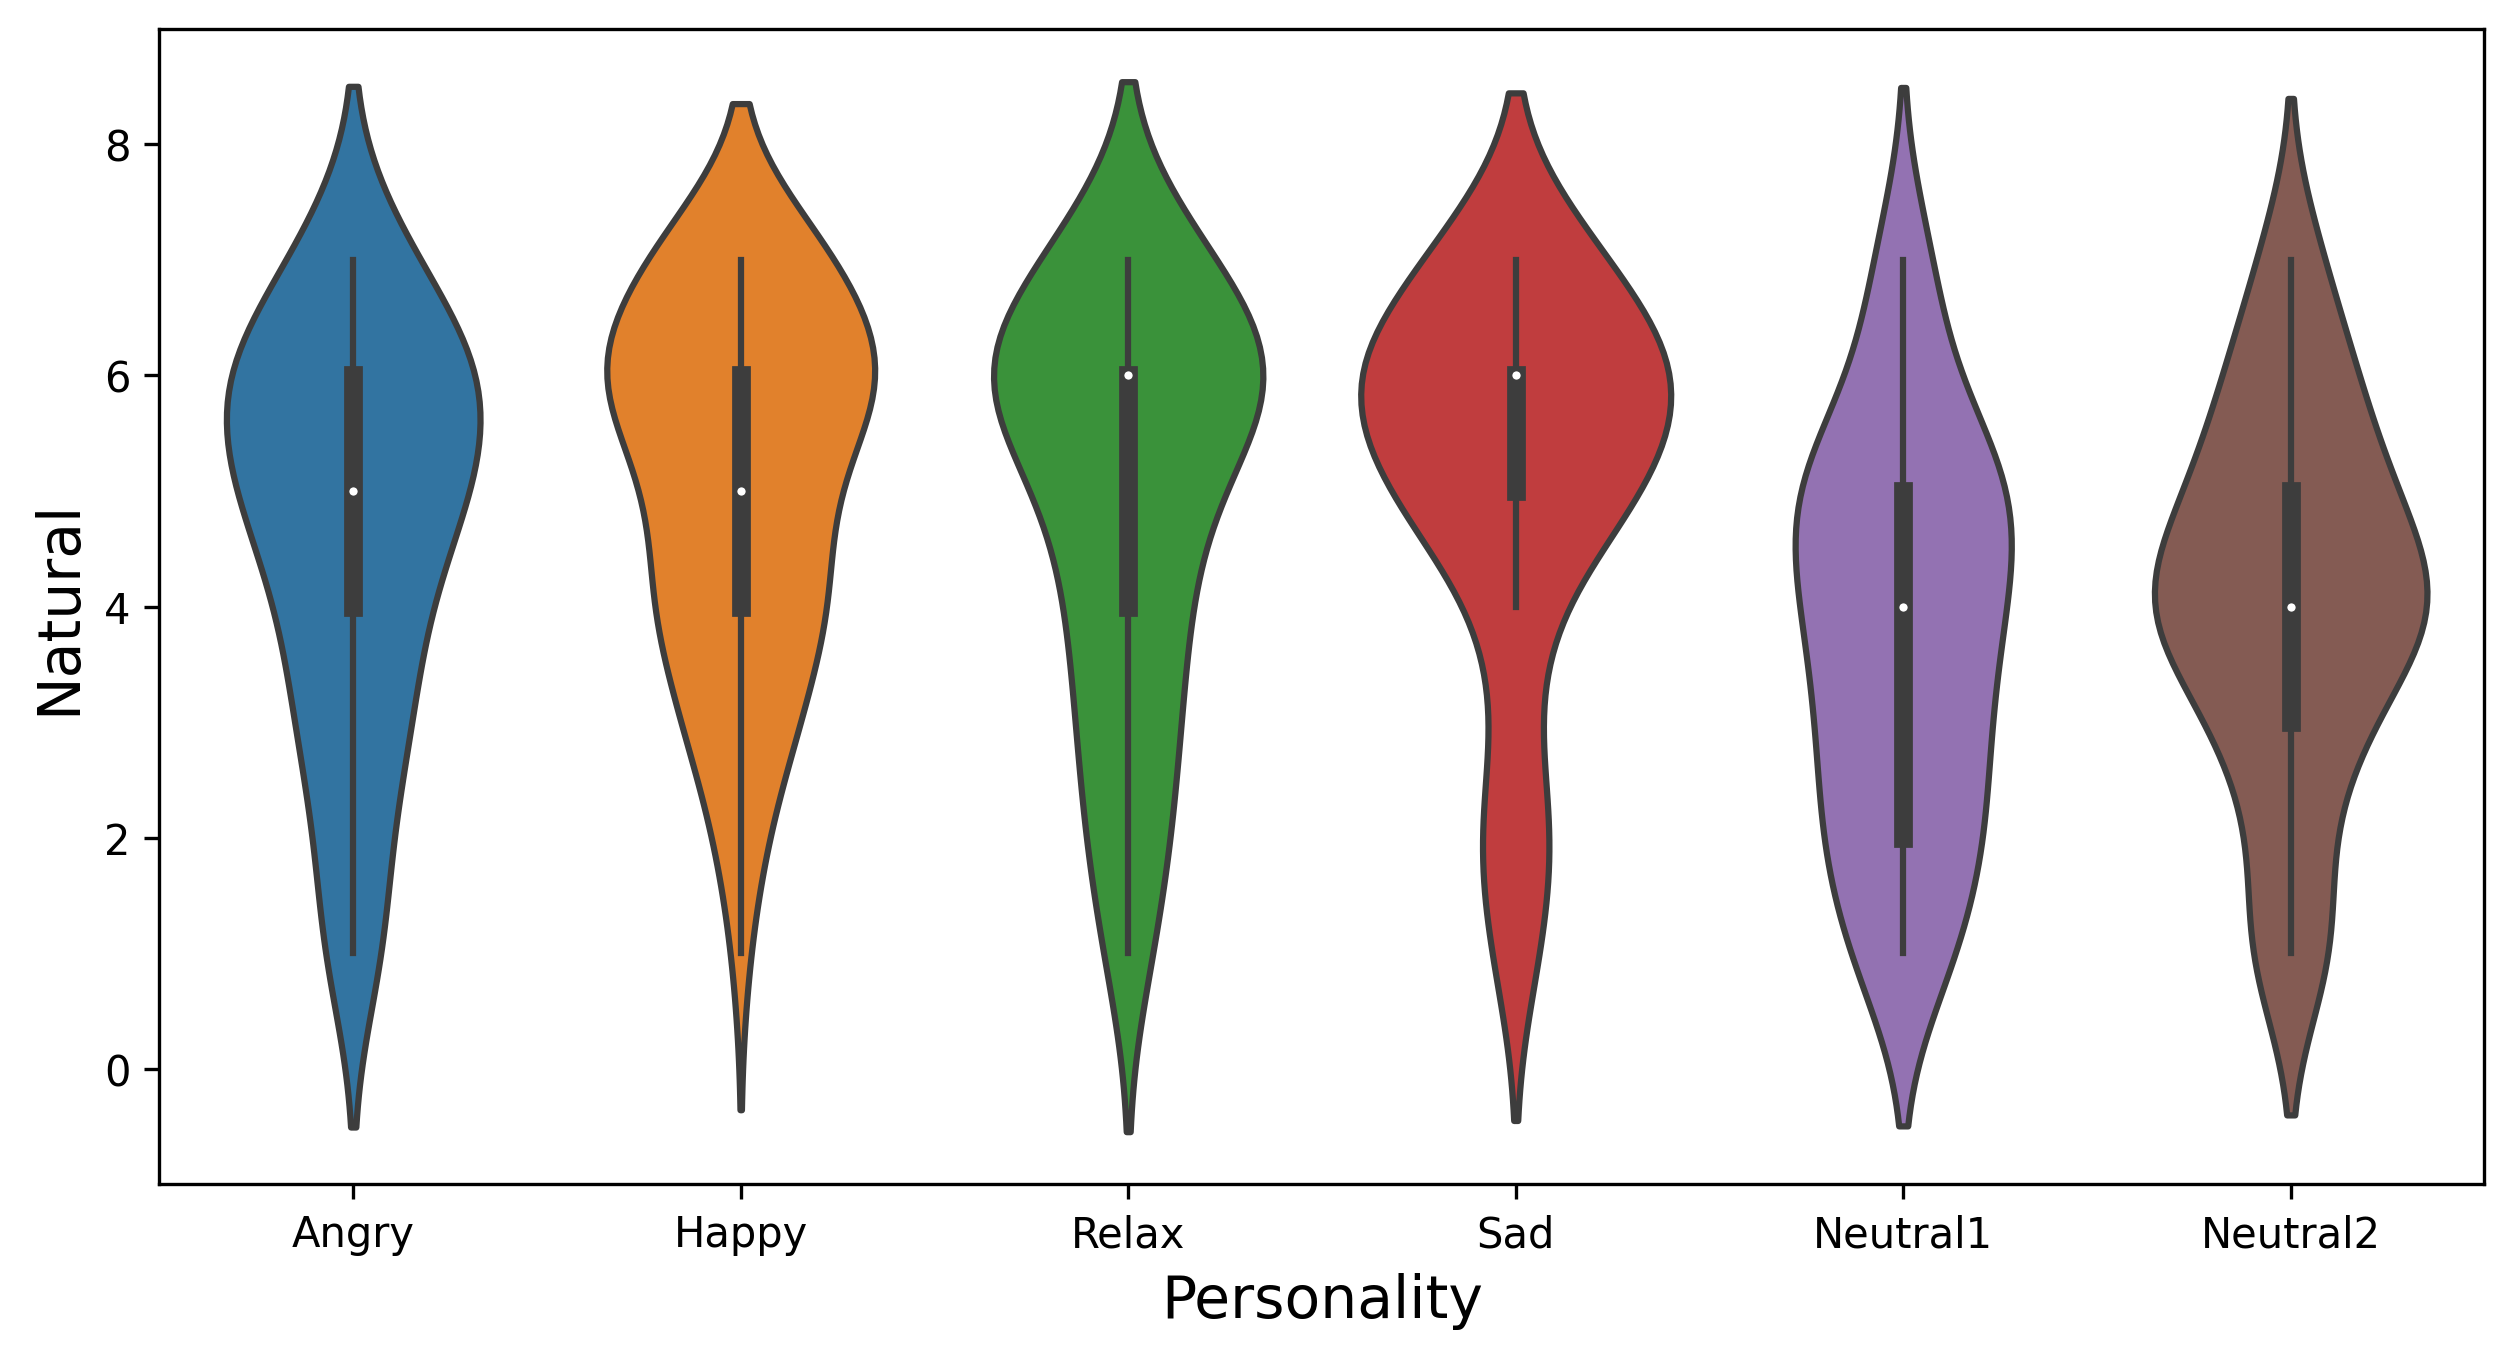

P-value nan with significance ***


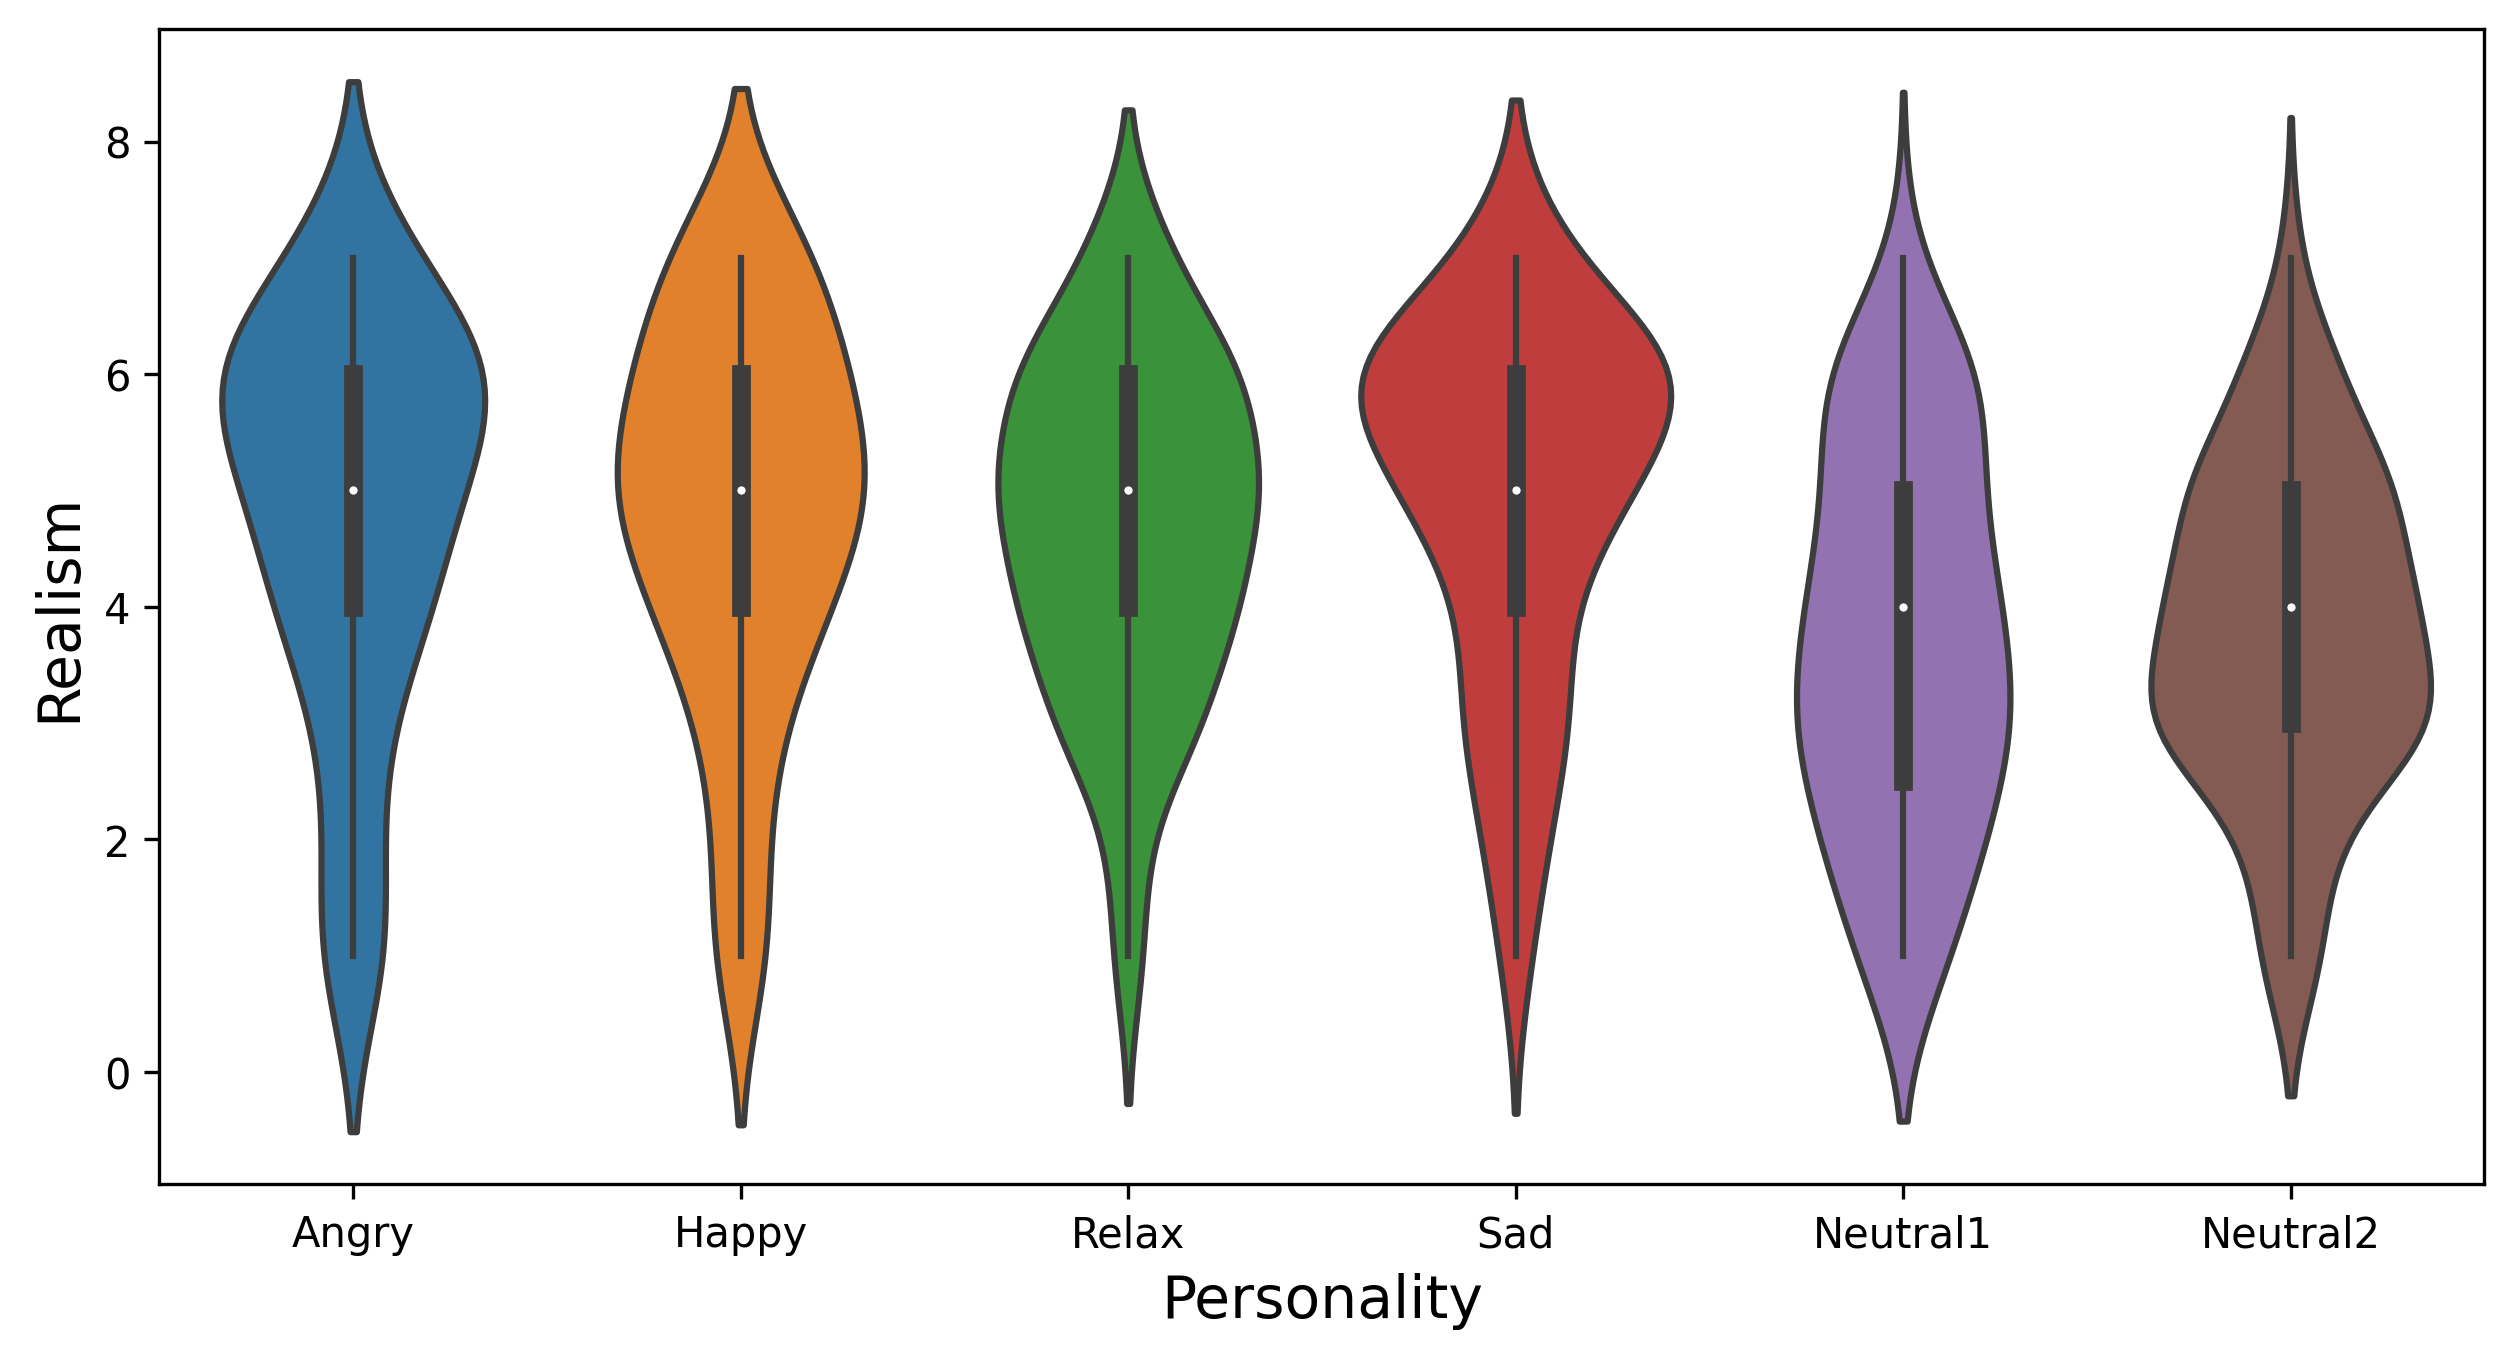

In [256]:
aute.make_binary_plot(data=df_all_cuest, 
                      x_feat="Personality", x_name="Personality", 
                      y_feat="Question1", y_name="Natural", 
                      violin_plot=True)

aute.make_binary_plot(data=df_all_cuest, 
                      x_feat="Personality", x_name="Personality", 
                      y_feat="Question2", y_name="Realism", 
                      violin_plot=True)

# Quizá deberia combinar ambos plots, donde por cada personalidad hay dos boxplots, uno de realismo y otro de naturalidad. 

## SAM Cuest

### Taking the questions directly

Questions 3 and 4

In [241]:
def rescale_feature(array, min_sc=-4, max_sc=4):
    num = max_sc * ( array-np.min(array) ) + min_sc * ( np.max(array) - array)
    den = np.max(array)-np.min(array)
    return num/den

In [242]:
print("Shape", df_happy.shape)

Shape (63, 34)


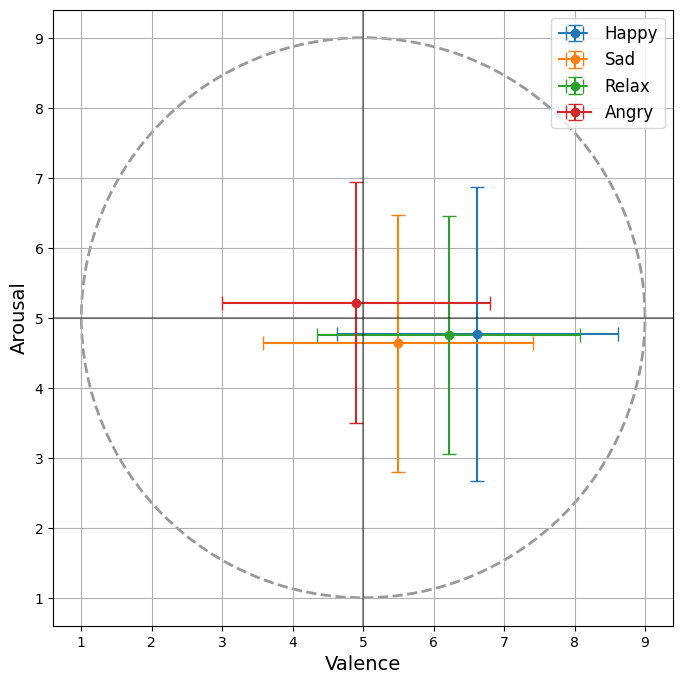

,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,61,0.000002,***,0.273684,-
1,Angry,Sad,61,0.140483,-,0.089742,-
2,Angry,Relax,61,0.000261,***,0.114358,-
3,Happy,Sad,63,0.000718,***,0.618488,-
4,Happy,Relax,63,0.178983,-,0.777450,-
5,Sad,Relax,63,0.028209,*,0.957019,-


In [259]:
# #######################
# ### SAM for Subject ###
# #######################

circle2 = plt.Circle((5, 5), 4, color='black', fill=False, linewidth=2, alpha=0.4, linestyle="--")

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar((df_happy["Question3"]).mean(), 
             (df_happy["Question4"].astype(np.int16)).mean(), 
             xerr=(df_happy["Question3"]).std(), 
             yerr=(df_happy["Question4"].astype(np.int16)).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar((df_sad["Question3"]).mean(), 
             (df_sad["Question4"]).mean(), 
             xerr=(df_sad["Question3"]).std(), 
             yerr=(df_sad["Question4"]).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar((df_relax["Question3"]).mean(), 
             (df_relax["Question4"]).mean(), 
             xerr=(df_relax["Question3"]).std(), 
             yerr=(df_relax["Question4"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar((df_angry["Question3"]).mean(), 
             (df_angry["Question4"].astype(np.int16)).mean(), 
             xerr=(df_angry["Question3"]).std(), 
             yerr=(df_angry["Question4"].astype(np.int16)).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(5, c="black", alpha=0.4)
plt.axhline(5, c="black", alpha=0.4)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

plt.savefig("Results/Images/SAMSubject.pdf", dpi=300, format="pdf")
plt.show()

personality_list = ["Angry", "Happy", "Sad", "Relax"]

results_subject_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = (df_all_cuest[df_all_cuest["Personality"] == p1]["Question3"]).dropna()
        x2 = (df_all_cuest[df_all_cuest["Personality"] == p2]["Question3"]).dropna()
        
        _, p_value_valencia = sp.stats.mannwhitneyu(x1, x2)
        
        x1 = (df_all_cuest[df_all_cuest["Personality"] == p1]["Question4"]).dropna().astype(np.int16)
        x2 = (df_all_cuest[df_all_cuest["Personality"] == p2]["Question4"]).dropna().astype(np.int16)
        
        _, p_value_arousal = sp.stats.mannwhitneyu(x1, x2)
        
        results_subject_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_subject_list)

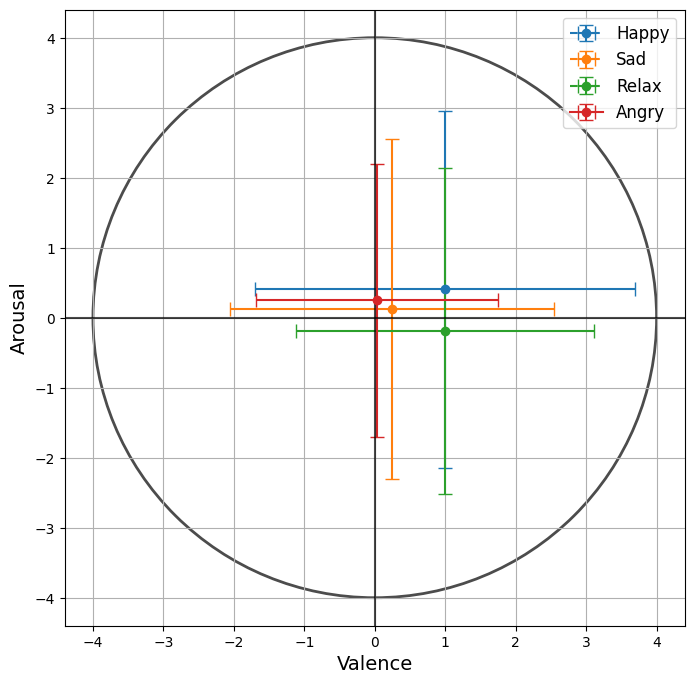

ValueError: operands could not be broadcast together with shapes (61,) (63,) 

In [245]:
# #######################
# ### SAM for Subject ###
# #######################

circle2 = plt.Circle((0, 0), 4, color='black', fill=False, linewidth=2, alpha=0.7)

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar((df_happy["Question3"]-df_neutral2["Question3"]).mean(), 
             (df_happy["Question4"].astype(np.int16)-df_neutral2["Question4"].astype(np.int16)).mean(), 
             xerr=(df_happy["Question3"]-df_neutral2["Question3"]).std(), 
             yerr=(df_happy["Question4"].astype(np.int16)-df_neutral2["Question4"].astype(np.int16)).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar((df_sad["Question3"]-df_neutral2["Question3"]).mean(), 
             (df_sad["Question4"]-df_neutral2["Question4"].astype(np.int16)).mean(), 
             xerr=(df_sad["Question3"]-df_neutral2["Question3"]).std(), 
             yerr=(df_sad["Question4"]-df_neutral2["Question4"].astype(np.int16)).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar((df_relax["Question3"]-df_neutral2["Question3"]).mean(), 
             (df_relax["Question4"]-df_neutral2["Question4"].astype(np.int16)).mean(), 
             xerr=(df_relax["Question3"]-df_neutral2["Question3"]).std(), 
             yerr=(df_relax["Question4"]-df_neutral2["Question4"].astype(np.int16)).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar((df_angry["Question3"]-df_neutral2["Question3"]).mean(), 
             (df_angry["Question4"].astype(np.int16)-df_neutral2["Question4"].astype(np.int16)).mean(), 
             xerr=(df_angry["Question3"]-df_neutral2["Question3"]).std(), 
             yerr=(df_angry["Question4"].astype(np.int16)-df_neutral2["Question4"].astype(np.int16)).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(0, c="black", alpha=0.7)
plt.axhline(0, c="black", alpha=0.7)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

plt.savefig("Results/Images/SAMSubject.pdf", dpi=300, format="pdf")
plt.show()

personality_list = ["Angry", "Happy", "Sad", "Relax"]

results_subject_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = (
            df_all_cuest[df_all_cuest["Personality"] == p1]["Question3"]
        ).dropna() - df_neutral2["Question3"].dropna().values
        x2 = (
            df_all_cuest[df_all_cuest["Personality"] == p2]["Question3"]
        ).dropna() - df_neutral2["Question3"].dropna().values
        
        _, p_value_valencia = sp.stats.mannwhitneyu(x1, x2)
        
        x1 = (
            df_all_cuest[df_all_cuest["Personality"] == p1]["Question4"]
        ).dropna().astype(np.int16) - df_neutral2["Question4"].values
        x2 = (
            df_all_cuest[df_all_cuest["Personality"] == p2]["Question4"]
        ).dropna().astype(np.int16) - df_neutral2["Question4"].values
        
        _, p_value_arousal = sp.stats.mannwhitneyu(x1, x2)
        
        results_subject_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_subject_list)

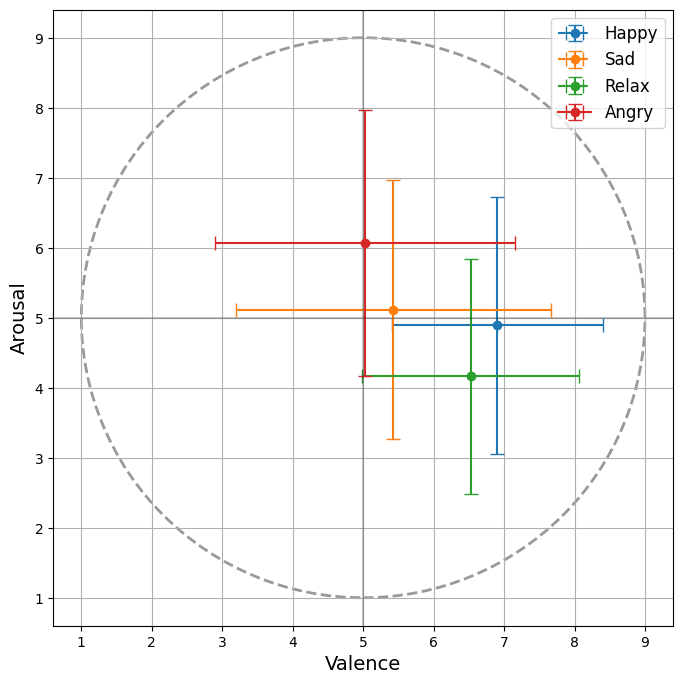

,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,61,0.000092,***,0.002997,**
1,Angry,Sad,61,0.323212,-,0.020369,*
2,Angry,Relax,61,0.924179,-,0.000001,***
3,Happy,Sad,63,0.004988,**,0.457932,-
4,Happy,Relax,63,0.000312,***,0.012840,*
5,Sad,Relax,63,0.332532,-,0.001926,**


In [251]:
circle2 = plt.Circle((5, 5), 4, color='black', fill=False, linewidth=2, alpha=0.4, linestyle="--")

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar((df_happy["Question6"]).mean(), 
             (df_happy["Question7"].astype(np.int16)).mean(), 
             xerr=(df_happy["Question6"]).std(), 
             yerr=(df_happy["Question7"].astype(np.int16)).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar((df_sad["Question6"]).mean(), 
             (df_sad["Question7"].astype(np.int16)).mean(), 
             xerr=(df_sad["Question6"]).std(), 
             yerr=(df_sad["Question7"].astype(np.int16)).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar((df_relax["Question6"]).mean(), 
             (df_relax["Question7"]).mean(), 
             xerr=(df_relax["Question6"]).std(), 
             yerr=(df_relax["Question7"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar((df_angry["Question6"]).mean(), 
             (df_angry["Question7"].astype(np.int16)).mean(), 
             xerr=(df_angry["Question6"]).std(), 
             yerr=(df_angry["Question7"].astype(np.int16)).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(5, c="black", alpha=0.2)
plt.axhline(5, c="black", alpha=0.2)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

plt.savefig("Results/Images/SAMVH.pdf", dpi=300, format="pdf")
plt.show()

personality_list = ["Angry", "Happy", "Sad", "Relax"]

results_vh_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p1]["Question6"]).dropna()
        x2 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p2]["Question6"]).dropna()
        
        _, p_value_valencia = sp.stats.mannwhitneyu(x1, x2)
        
        x1 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p1]["Question7"]).dropna().astype(np.int16)
        x2 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p2]["Question7"]).dropna().astype(np.int16)
        
        _, p_value_arousal = sp.stats.mannwhitneyu(x1, x2)
        
        results_vh_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_vh_list)

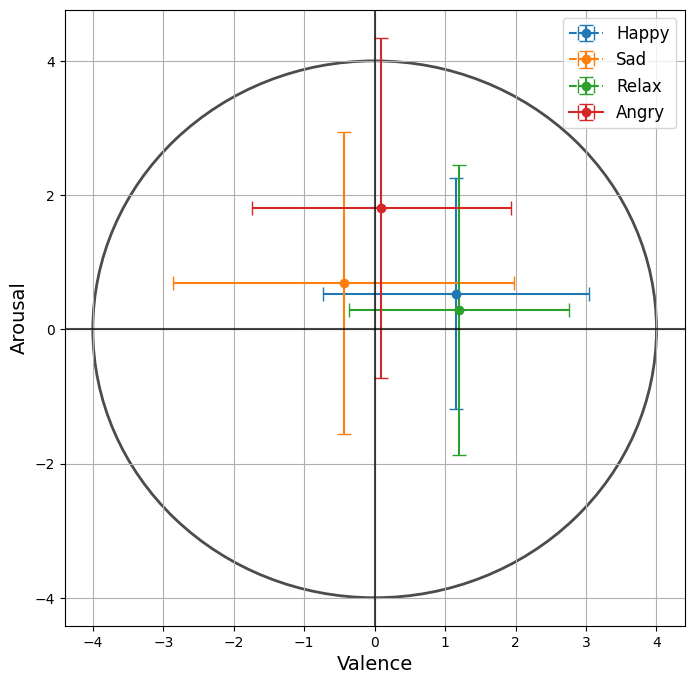

ValueError: operands could not be broadcast together with shapes (61,) (63,) 

In [212]:
# #######################
# ### SAM for Subject ###
# #######################

circle2 = plt.Circle((0, 0), 4, color='black', fill=False, linewidth=2, alpha=0.7)

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar((df_happy["Question6"]-df_neutral2["Question6"]).mean(), 
             (df_happy["Question7"].astype(np.int16)-df_neutral2["Question7"].astype(np.int16)).mean(), 
             xerr=(df_happy["Question6"]-df_neutral2["Question6"]).std(), 
             yerr=(df_happy["Question7"].astype(np.int16)-df_neutral2["Question7"].astype(np.int16)).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar((df_sad["Question6"]-df_neutral2["Question6"]).mean(), 
             (df_sad["Question7"]-df_neutral2["Question7"].astype(np.int16)).mean(), 
             xerr=(df_sad["Question6"]-df_neutral2["Question6"]).std(), 
             yerr=(df_sad["Question7"]-df_neutral2["Question7"].astype(np.int16)).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar((df_relax["Question6"]-df_neutral2["Question6"]).mean(), 
             (df_relax["Question7"]-df_neutral2["Question7"].astype(np.int16)).mean(), 
             xerr=(df_relax["Question6"]-df_neutral2["Question6"]).std(), 
             yerr=(df_relax["Question7"]-df_neutral2["Question7"].astype(np.int16)).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar((df_angry["Question6"]-df_neutral2["Question6"]).mean(), 
             (df_angry["Question7"].astype(np.int16)-df_neutral2["Question7"].astype(np.int16)).mean(), 
             xerr=(df_angry["Question6"]-df_neutral2["Question6"]).std(), 
             yerr=(df_angry["Question7"].astype(np.int16)-df_neutral2["Question7"].astype(np.int16)).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(0, c="black", alpha=0.7)
plt.axhline(0, c="black", alpha=0.7)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

plt.savefig("Results/Images/SAMSubject.pdf", dpi=300, format="pdf")
plt.show()

personality_list = ["Angry", "Happy", "Sad", "Relax"]

results_subject_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = (df_all_cuest[df_all_cuest["Personality"] == p1]["Question6"]).dropna() - df_neutral2["Question6"].values
        x2 = (df_all_cuest[df_all_cuest["Personality"] == p2]["Question6"]).dropna() - df_neutral2["Question6"].values
        
        _, p_value_valencia = sp.stats.mannwhitneyu(x1, x2)
        
        x1 = (
            df_all_cuest[df_all_cuest["Personality"] == p1]["Question7"]
        ).dropna().astype(np.int16) - df_neutral2["Question7"].values
        x2 = (
            df_all_cuest[df_all_cuest["Personality"] == p2]["Question7"]
        ).dropna().astype(np.int16) - df_neutral2["Question7"].values
        
        _, p_value_arousal = sp.stats.mannwhitneyu(x1, x2)
        
        results_subject_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_subject_list)

### Final questions VAS Cuest

In [180]:
features_to_change_subject = [
    'Disgusto', 'Felicidad', 'Enfado', 'Miedo', 'Relajado',
    'Sorpresa', 'Tristeza'
]

features_to_change_avatar = [
    'Disgusto.1', 'Felicidad.1', 'Enfado.1',
    'Miedo.1', 'Relajado.1', 'Sorpresa.1', 'Tristeza.1'
]

def achieve_vas_boxplot(data):
    state_vas_plot_list = []
    for i in range(data.shape[0]):
        if "User" in data["Usuario"].iloc[i]:
            for feat in features_to_change_subject:
                state_vas_plot_list.append({
                    "User": data["Usuario"].iloc[i],
                    "State": feat,
                    "Value": data[feat].iloc[i],
                    "Agent": "Human"
                })

            for feat in features_to_change_avatar:
                new_feat = feat.split(".")[0]
                state_vas_plot_list.append({
                    "User": data["Usuario"].iloc[i],
                    "State": new_feat,
                    "Value": data[feat].iloc[i],
                    "Agent": "VH"
                })

    return pd.DataFrame(state_vas_plot_list)

Angry


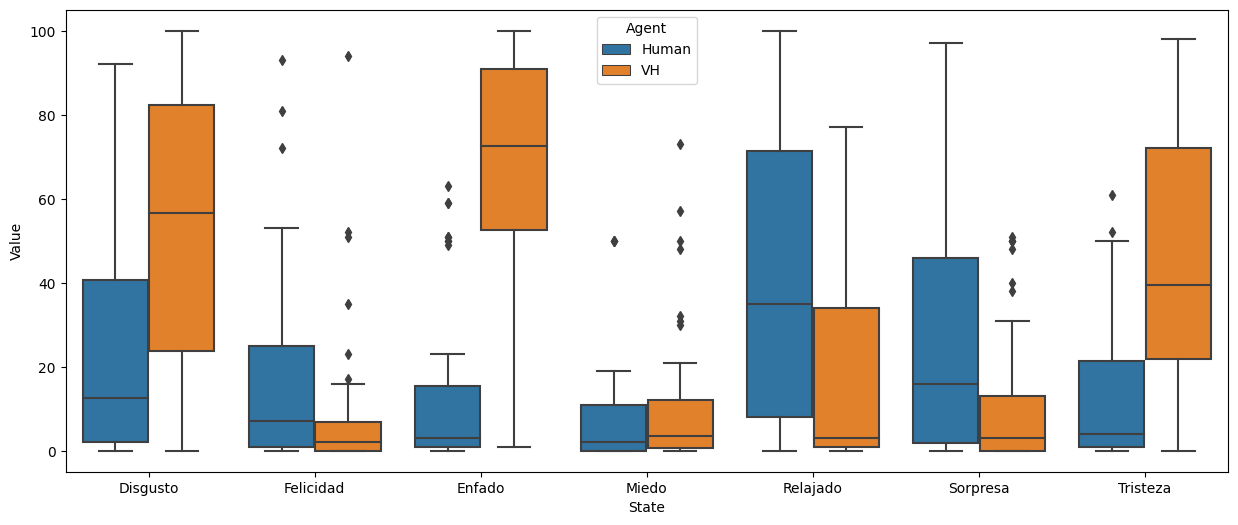

Happy


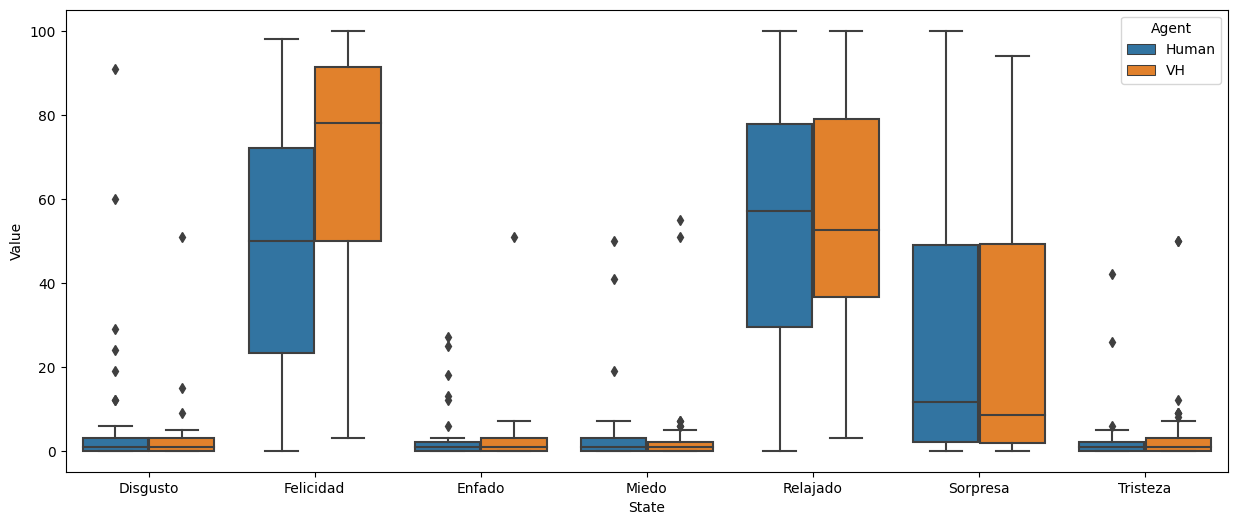

Sad


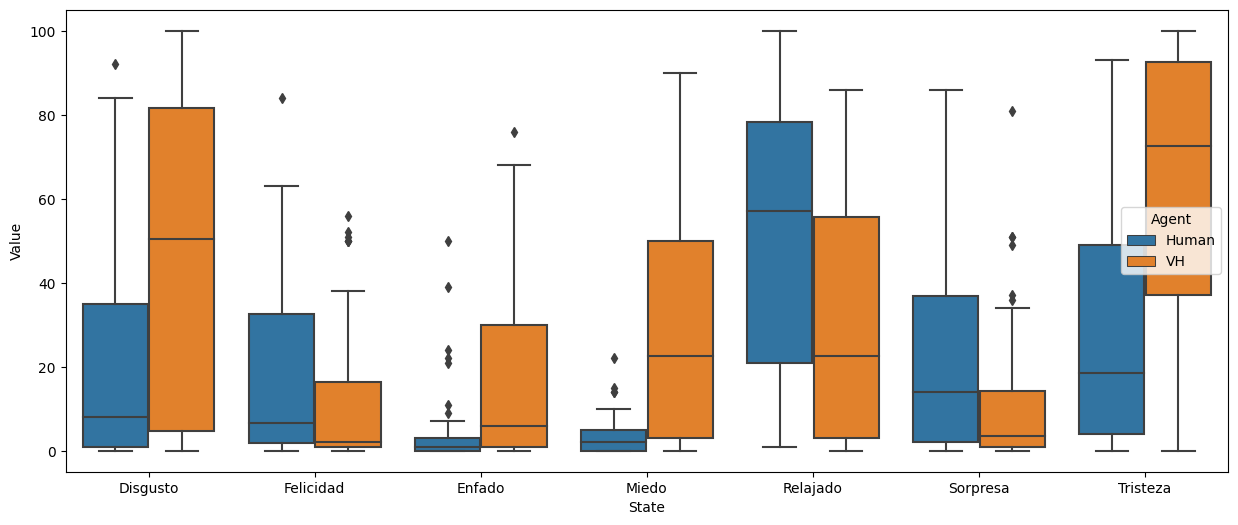

Relax


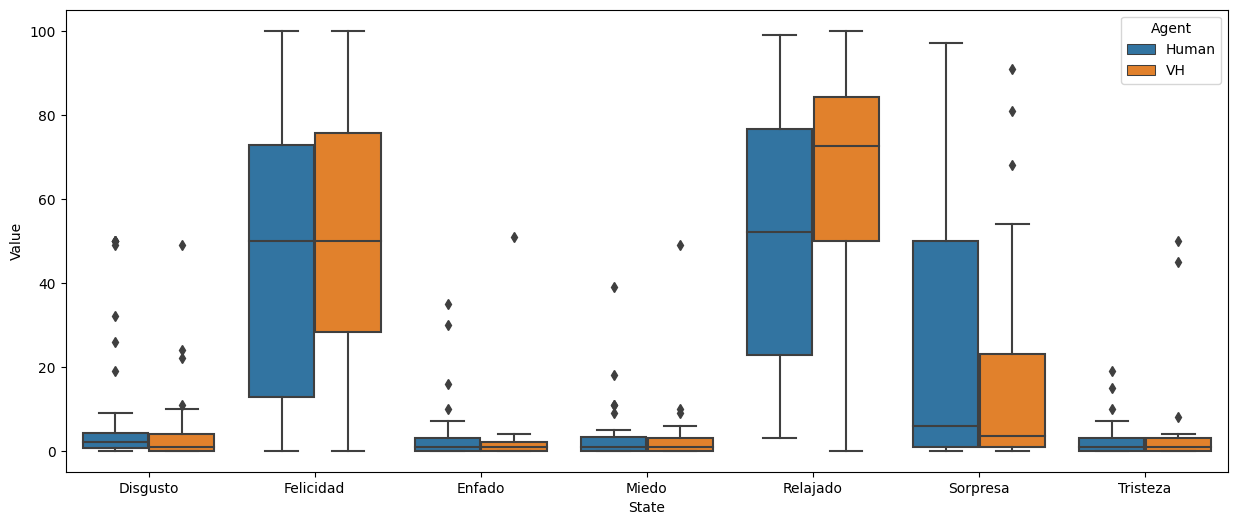

In [252]:
# Angry
print("Angry")
df_angry_vas_plot= achieve_vas_boxplot(df_angry)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_angry_vas_plot)
plt.savefig("Results/Images/AngryVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Happy
print("Happy")
df_happy_vas_plot= achieve_vas_boxplot(df_happy)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_happy_vas_plot)
plt.savefig("Results/Images/HappyVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Sad
print("Sad")
df_sad_vas_plot= achieve_vas_boxplot(df_sad)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_sad_vas_plot)
plt.savefig("Results/Images/SadVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Relax
print("Relax")
df_relax_vas_plot= achieve_vas_boxplot(df_relax)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_relax_vas_plot)
plt.savefig("Results/Images/RelaxVASBosplot.pdf", dpi=300, format="pdf")
plt.show()